In [1]:
#load libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import random
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load data
dta1 = pd.read_csv("dta1.csv")
dta2 = pd.read_csv("dta2.csv")

## Data Exploration

In [3]:
#shape of data
print("Shape of dta1 is: " + str(dta1.shape))
print("Shape of dta2 is: " + str(dta2.shape))

Shape of dta1 is: (3756, 3)
Shape of dta2 is: (2353, 3)


In [4]:
#check the data
dta1.head()

,user,joined_timestamp,num_auctions_engaged
0,buyer,2016-01-03 02:20:27,22
1,buyer,2016-01-03 07:57:13,17
2,buyer,2016-01-05 00:43:05,25
3,buyer,2016-01-05 03:22:16,20
4,buyer,2016-01-05 06:15:42,18


In [5]:
dta2.head()

,user,joined_timestamp,num_auctions_engaged
0,buyer,2018-01-01 03:29:38,28
1,seller,2018-01-01 05:22:53,12
2,buyer,2018-01-01 05:33:32,27
3,buyer,2018-01-01 06:58:19,28
4,buyer,2018-01-01 12:42:00,30


Both datasets have the same columns.  user, joined and number of auctions.  No unique identifiers.

In [8]:
#data description
dta1.describe()

,num_auctions_engaged
count,3756.000000
mean,21.873802
std,5.694396
min,7.000000
25%,17.000000
50%,22.000000
75%,26.000000
max,39.000000


In [9]:
dta2.describe()

,num_auctions_engaged
count,2353.000000
mean,22.937952
std,6.002867
min,9.000000
25%,17.000000
50%,24.000000
75%,28.000000
max,37.000000


In [10]:
#check for missing data
print(dta1.isnull().sum()) 

user                    0
joined_timestamp        0
num_auctions_engaged    0
dtype: int64


In [11]:
#check for missing dta2
print(dta2.isnull().sum()) 

user                    0
joined_timestamp        0
num_auctions_engaged    0
dtype: int64


No missing data which is great.

In [12]:
#check the type of users
print(dta1.user.unique())
print(dta2.user.unique())

['buyer' 'seller']
['buyer' 'seller']


Both datasets have the same user types

In [13]:
#check the date time stamps
print(dta1.joined_timestamp.unique())
print(dta2.joined_timestamp.unique())

['2016-01-03 02:20:27' '2016-01-03 07:57:13' '2016-01-05 00:43:05' ...
 '2017-12-30 05:06:48' '2017-12-30 10:19:54' '2017-12-30 12:00:40']
['2018-01-01 03:29:38' '2018-01-01 05:22:53' '2018-01-01 05:33:32' ...
 '2018-03-31 08:21:23' '2018-03-31 08:27:26' '2018-03-31 09:39:29']


In [14]:
#check min and max date
print ("dta1 min and max dates are: " + str(dta1.joined_timestamp.min()) + " " +  str(dta1.joined_timestamp.max()))
print ("dta2 min and max dates are: " + str(dta2.joined_timestamp.min()) + " " + str(dta2.joined_timestamp.max()))

dta1 min and max dates are: 2016-01-03 02:20:27 2017-12-30 12:00:40
dta2 min and max dates are: 2018-01-01 03:29:38 2018-03-31 09:39:29


The first dataset has a timerange of 12 months and the second one has about 3 months

In [15]:
#clean data column
dta1['joined_date'] = pd.to_datetime(dta1['joined_timestamp'])
dta2['joined_date'] = pd.to_datetime(dta2['joined_timestamp'])

,user,joined_timestamp,num_auctions_engaged,joined_date
0,buyer,2016-01-03 02:20:27,22,2016-01-03
1,buyer,2016-01-03 07:57:13,17,2016-01-03
2,buyer,2016-01-05 00:43:05,25,2016-01-05
3,buyer,2016-01-05 03:22:16,20,2016-01-05
4,buyer,2016-01-05 06:15:42,18,2016-01-05
...,...,...,...,...
3751,buyer,2017-12-30 04:26:58,30,2017-12-30
3752,buyer,2017-12-30 04:53:41,31,2017-12-30
3753,buyer,2017-12-30 05:06:48,23,2017-12-30
3754,buyer,2017-12-30 10:19:54,30,2017-12-30


In [19]:
#create year column, month, day column
import datetime

dta1['year'] = dta1['joined_date'].dt.year
dta1['month'] = dta1['joined_date'].dt.month
dta1['day'] = dta1['joined_date'].dt.day

dta2['year'] = dta2['joined_date'].dt.year
dta2['month'] = dta2['joined_date'].dt.month
dta2['day'] = dta2['joined_date'].dt.day

AttributeError: Can only use .dt accessor with datetimelike values

## Visualization

In [34]:
#Aggregate the data
column_info = ['joined_date','user','num_auctions_engaged']
dta1_agg = dta1[column_info]
dta1_agg = dta1.groupby(['joined_date', 'user'], as_index=False)['num_auctions_engaged'].sum()

dta2_agg = dta2[column_info]
dta2_agg = dta2.groupby(['joined_date', 'user'], as_index=False)['num_auctions_engaged'].sum()

In [36]:
dta1_agg.set_index('joined_date', inplace=True)
dta2_agg.set_index('joined_date', inplace=True)

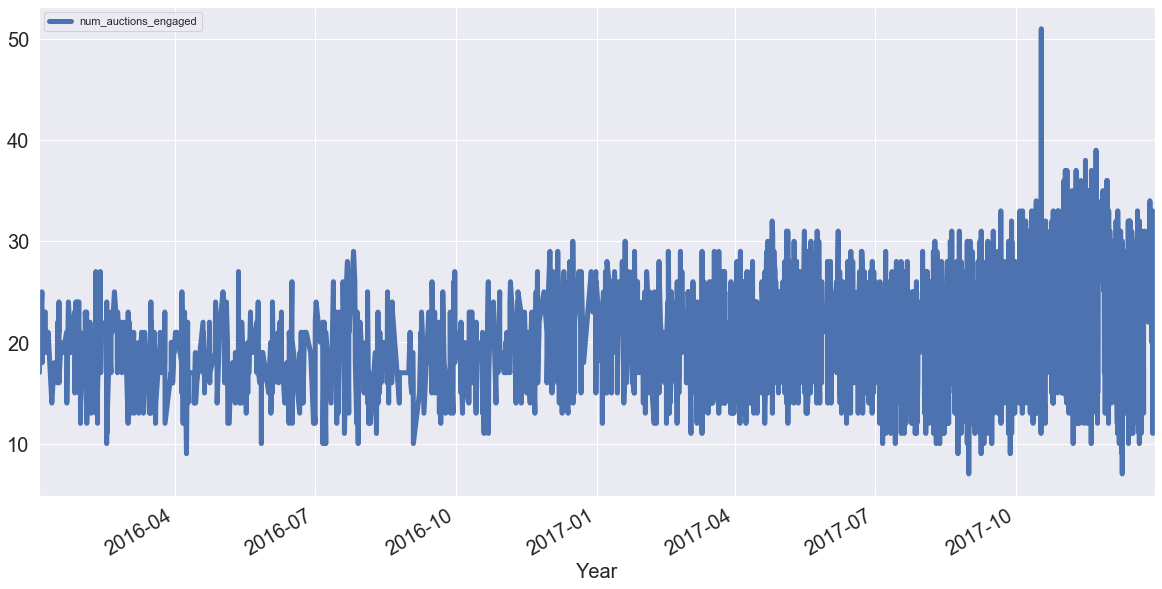

In [37]:
dta1_agg.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

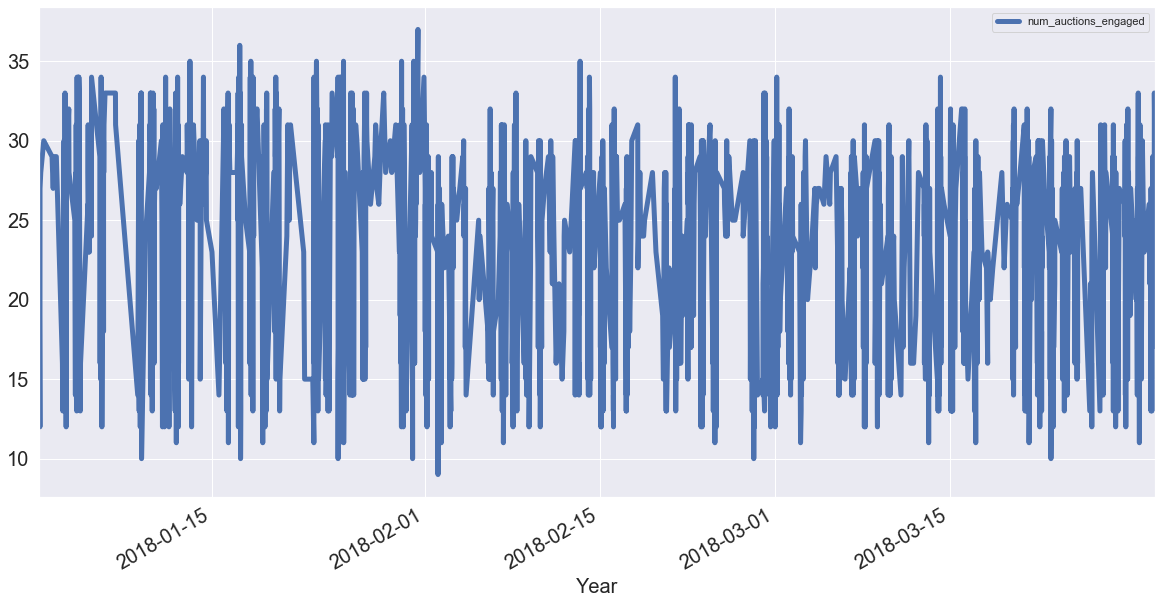

In [39]:
dta2_agg.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

Data seems to be all over the place. Although daily auctions seem to range between 7 and 51.  Massive increase in 2017 compared to 2016.

In [40]:
dta1_agg.describe()

,num_auctions_engaged
count,3755.000000
mean,21.879627
std,5.714053
min,7.000000
25%,17.000000
50%,22.000000
75%,26.000000
max,51.000000


In [41]:
dta2_agg.describe()

,num_auctions_engaged
count,2353.000000
mean,22.937952
std,6.002867
min,9.000000
25%,17.000000
50%,24.000000
75%,28.000000
max,37.000000


In [42]:
#filter dta1 by buyer
dta1_agg_buyer = dta1_agg[dta1_agg['user']=='buyer']

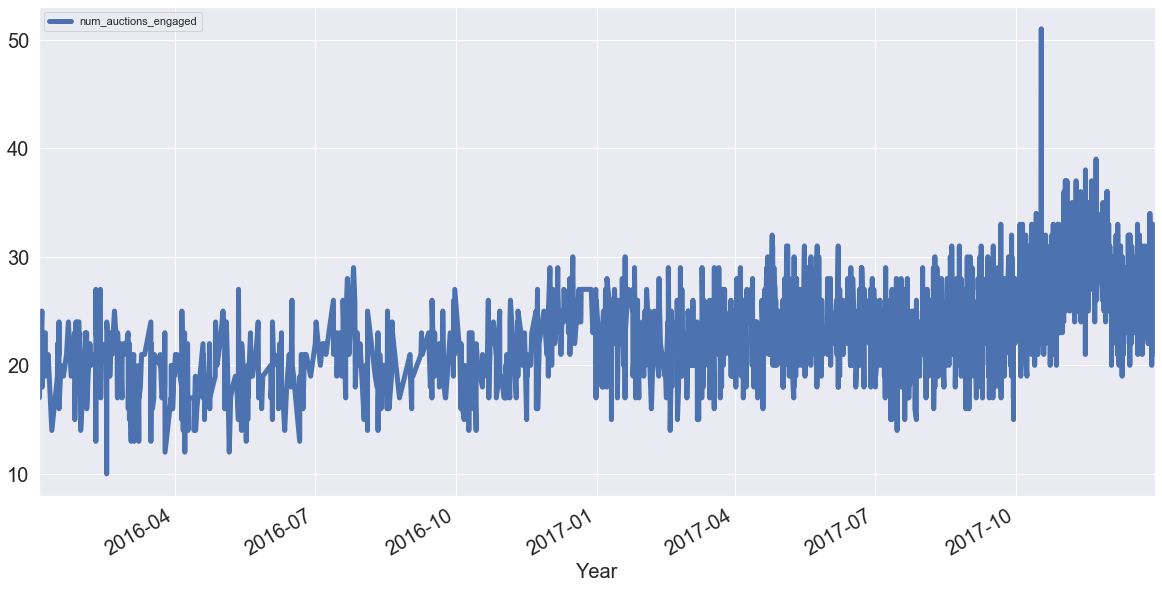

In [46]:
#dta for buyer graph
dta1_agg_buyer.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [47]:
#filter dta1 by seller
dta1_agg_seller = dta1_agg[dta1_agg['user']=='seller']

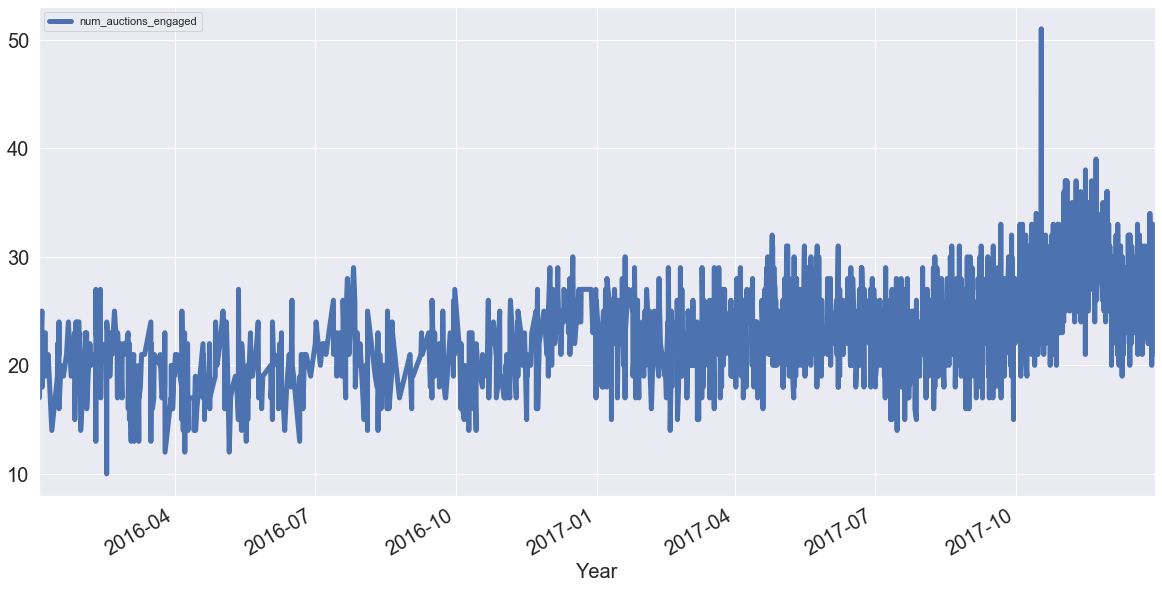

In [48]:
#dta1 for seller graph
dta1_agg_buyer.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

dta1 buyer and seller patterns are quite similar.

In [50]:
column_info = ['year','month','user','num_auctions_engaged']
dta1_year_month = dta1[column_info]
dta1_year_month = dta1.groupby(['year','month', 'user'], as_index=False)['num_auctions_engaged'].sum()

In [53]:
#filter dta1 by seller
dta1_year_month_seller = dta1_year_month[dta1_year_month['user']=='seller']

,year,month,user,num_auctions_engaged
1,2016,1,seller,141
3,2016,2,seller,170
5,2016,3,seller,176
7,2016,4,seller,35
9,2016,5,seller,298
11,2016,6,seller,222
13,2016,7,seller,132
15,2016,8,seller,176
17,2016,9,seller,385
19,2016,10,seller,251


In [54]:
#filter dta1 by buyer
dta1_year_month_buyer = dta1_year_month[dta1_year_month['user']=='buyer']

,year,month,user,num_auctions_engaged
0,2016,1,buyer,716
2,2016,2,buyer,982
4,2016,3,buyer,957
6,2016,4,buyer,762
8,2016,5,buyer,855
10,2016,6,buyer,650
12,2016,7,buyer,784
14,2016,8,buyer,553
16,2016,9,buyer,743
18,2016,10,buyer,770


In [63]:
dta1_year_month_buyer.set_index(['year','month'], inplace=True)
dta1_year_month_seller.set_index(['year','month'], inplace=True)

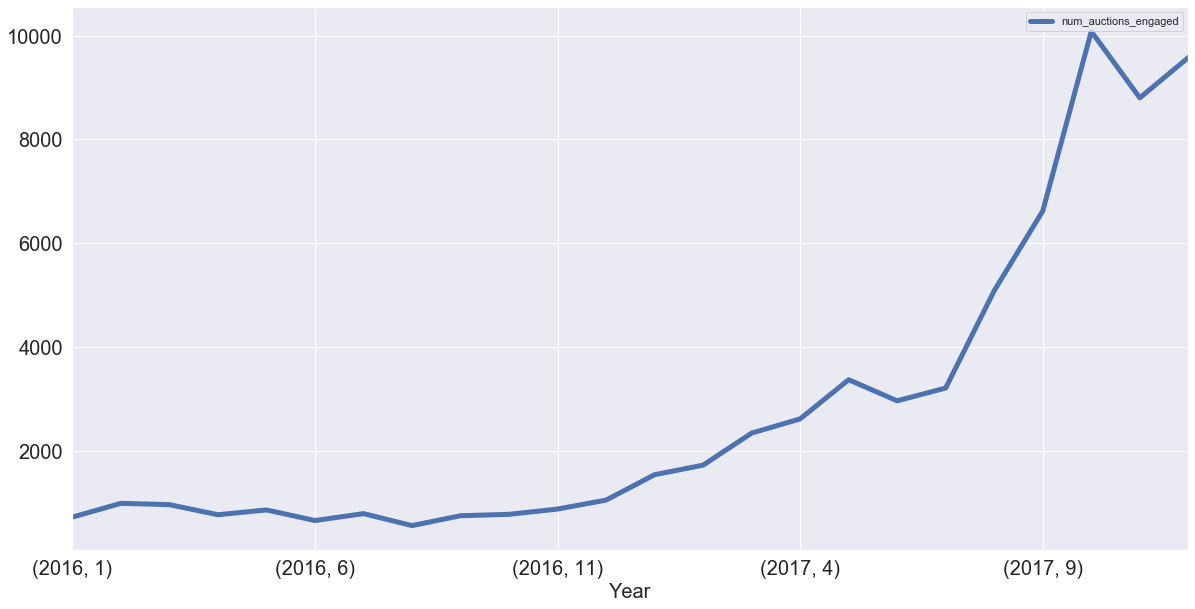

In [64]:
#dta1 year month graph by buyer
dta1_year_month_buyer.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

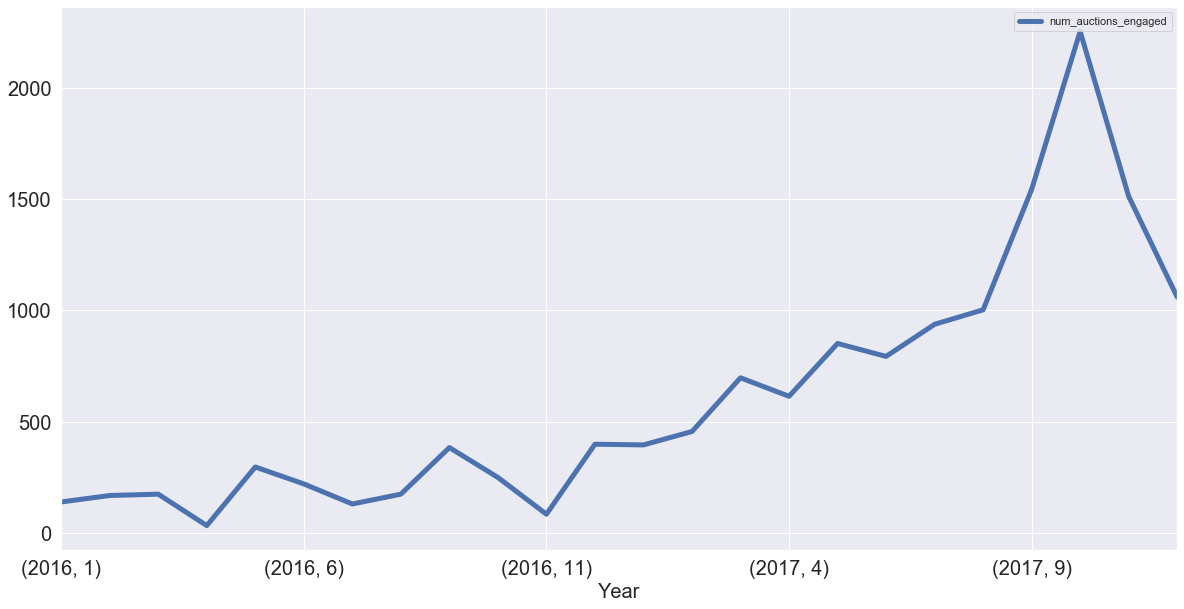

In [65]:
#dta1 year month graph by seller
dta1_year_month_seller.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [66]:
column_info = ['year','month','user','num_auctions_engaged']
dta2_year_month = dta2[column_info]
dta2_year_month = dta2.groupby(['year','month', 'user'], as_index=False)['num_auctions_engaged'].sum()

In [67]:
#filter dta1 by buyer
dta2_year_month_buyer = dta2_year_month[dta2_year_month['user']=='buyer']

In [68]:
#filter dta1 by seller
dta2_year_month_seller = dta2_year_month[dta1_year_month['user']=='seller']

In [72]:
dta2_year_month_buyer

user  num_auctions_engaged
year month                             
2018 1      buyer                 13943
     2      buyer                 11634
     3      buyer                 16706

In [73]:
dta2_year_month_seller

user  num_auctions_engaged
year month                              
2018 1      seller                  2598
     2      seller                  3697
     3      seller                  5395

In [69]:
dta2_year_month_buyer.set_index(['year','month'], inplace=True)
dta2_year_month_seller.set_index(['year','month'], inplace=True)

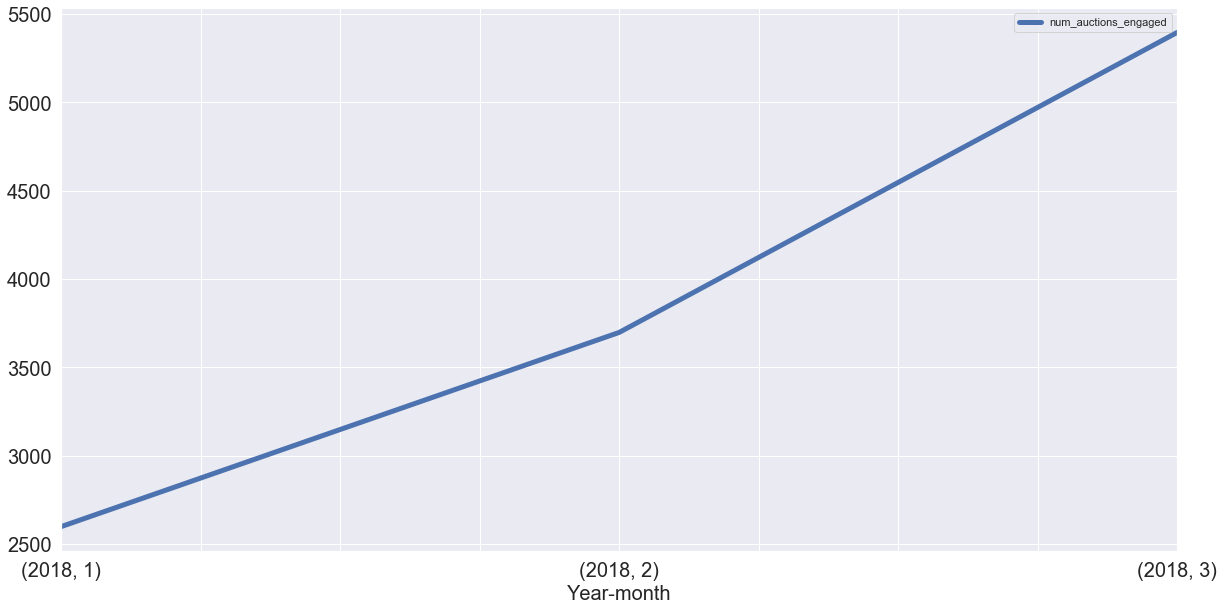

In [70]:
#dta1 year month graph by buyer
dta2_year_month_seller.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year-month', fontsize=20);

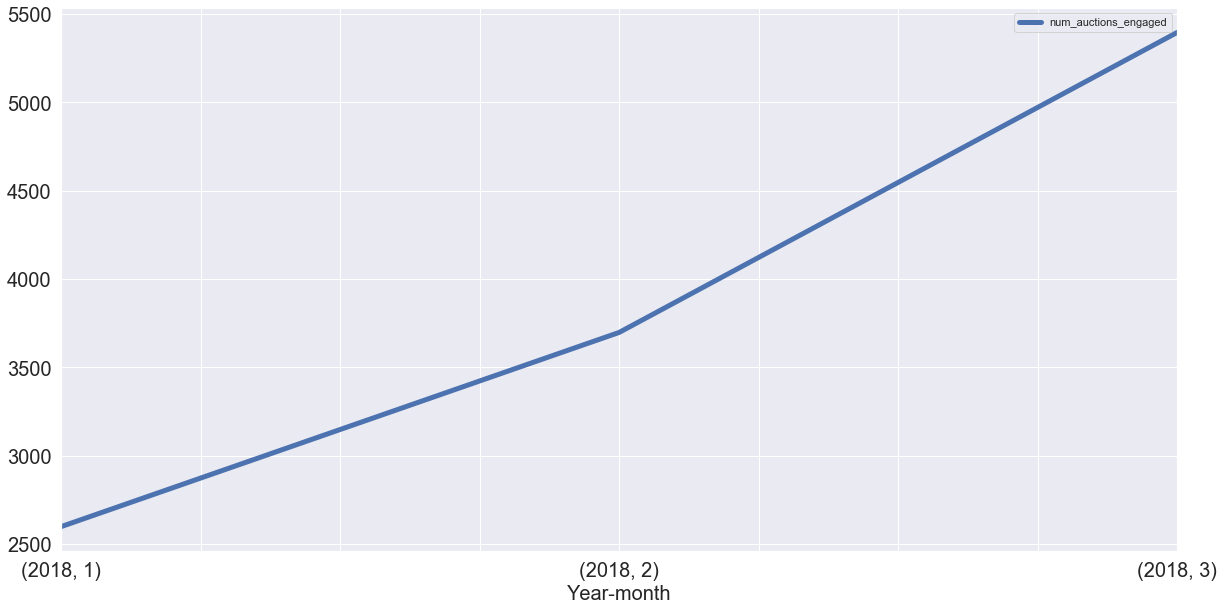

In [71]:
#dta1 year month graph by seller
dta2_year_month_seller.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year-month', fontsize=20);

## State of the market


The buyers joining actions jumped by 497% from 2016 to 2017.  The sellers joining auctions jumped by 390% in the same time-frame.  2018 would most likely surpass 2017 numbers.   The number of buyers and sellers in the first 3 months already account for 73% for buyers and 96% for sellers compared to 2017.

## Modelling

In [ ]:
### Approach 1 - Use regression - Use dta1 as train and dta2 as test

In [74]:
dta1

,user,joined_timestamp,num_auctions_engaged,joined_date,year,month,day
0,buyer,2016-01-03 02:20:27,22,2016-01-03 02:20:27,2016,1,3
1,buyer,2016-01-03 07:57:13,17,2016-01-03 07:57:13,2016,1,3
2,buyer,2016-01-05 00:43:05,25,2016-01-05 00:43:05,2016,1,5
3,buyer,2016-01-05 03:22:16,20,2016-01-05 03:22:16,2016,1,5
4,buyer,2016-01-05 06:15:42,18,2016-01-05 06:15:42,2016,1,5
...,...,...,...,...,...,...,...
3751,buyer,2017-12-30 04:26:58,30,2017-12-30 04:26:58,2017,12,30
3752,buyer,2017-12-30 04:53:41,31,2017-12-30 04:53:41,2017,12,30
3753,buyer,2017-12-30 05:06:48,23,2017-12-30 05:06:48,2017,12,30
3754,buyer,2017-12-30 10:19:54,30,2017-12-30 10:19:54,2017,12,30


In [ ]:
### Approach 2 - use time series

In [ ]:
## Outcome and Next Steps